In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sn
import os

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

#import algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

In [74]:
#load the dataset

df = pd.read_csv("data-final.csv",sep='\t')

In [75]:
#check the dataset

print(df.head(5))
print(df.shape)

   EXT1  EXT2  EXT3  EXT4  EXT5  EXT6  EXT7  EXT8  EXT9  EXT10  ...  \
0   4.0   1.0   5.0   2.0   5.0   1.0   5.0   2.0   4.0    1.0  ...   
1   3.0   5.0   3.0   4.0   3.0   3.0   2.0   5.0   1.0    5.0  ...   
2   2.0   3.0   4.0   4.0   3.0   2.0   1.0   3.0   2.0    5.0  ...   
3   2.0   2.0   2.0   3.0   4.0   2.0   2.0   4.0   1.0    4.0  ...   
4   3.0   3.0   3.0   3.0   5.0   3.0   3.0   5.0   3.0    4.0  ...   

              dateload  screenw  screenh  introelapse  testelapse  endelapse  \
0  2016-03-03 02:01:01    768.0   1024.0          9.0       234.0          6   
1  2016-03-03 02:01:20   1360.0    768.0         12.0       179.0         11   
2  2016-03-03 02:01:56   1366.0    768.0          3.0       186.0          7   
3  2016-03-03 02:02:02   1920.0   1200.0        186.0       219.0          7   
4  2016-03-03 02:02:57   1366.0    768.0          8.0       315.0         17   

   IPC  country  lat_appx_lots_of_err  long_appx_lots_of_err  
0    1       GB              

In [76]:
#remove unnecessary columns

new_df = df.drop(df.columns[50:],axis=1)

In [77]:
#check the dataset

new_df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0


In [78]:
#check missing values

new_df.isnull().sum()

EXT1     1783
EXT2     1783
EXT3     1783
EXT4     1783
EXT5     1783
EXT6     1783
EXT7     1783
EXT8     1783
EXT9     1783
EXT10    1783
EST1     1783
EST2     1783
EST3     1783
EST4     1783
EST5     1783
EST6     1783
EST7     1783
EST8     1783
EST9     1783
EST10    1783
AGR1     1783
AGR2     1783
AGR3     1783
AGR4     1783
AGR5     1783
AGR6     1783
AGR7     1783
AGR8     1783
AGR9     1783
AGR10    1783
CSN1     1783
CSN2     1783
CSN3     1783
CSN4     1783
CSN5     1783
CSN6     1783
CSN7     1783
CSN8     1783
CSN9     1783
CSN10    1783
OPN1     1783
OPN2     1783
OPN3     1783
OPN4     1783
OPN5     1783
OPN6     1783
OPN7     1783
OPN8     1783
OPN9     1783
OPN10    1783
dtype: int64

In [79]:
#drop the missing values

new_df.dropna(inplace=True)

In [80]:
#take a sample from the dataset

#scaler = StandardScaler()

new_df_sample = new_df.sample(100000)
#new_df_sample = scaler.fit_transform(new_df_sample)

------- Fitting for 2 clusters -------
------- Fitting for 3 clusters -------
------- Fitting for 4 clusters -------
------- Fitting for 5 clusters -------
------- Fitting for 6 clusters -------
------- Fitting for 7 clusters -------
------- Fitting for 8 clusters -------
------- Fitting for 9 clusters -------
------- Fitting for 10 clusters -------
------- Fitting for 11 clusters -------
------- Fitting for 12 clusters -------
------- Fitting for 13 clusters -------
------- Fitting for 14 clusters -------
------- Fitting for 15 clusters -------
------- Fitting for 16 clusters -------
------- Fitting for 17 clusters -------
------- Fitting for 18 clusters -------
------- Fitting for 19 clusters -------
------- Fitting for 20 clusters -------
------- Fitting for 21 clusters -------
------- Fitting for 22 clusters -------
------- Fitting for 23 clusters -------
------- Fitting for 24 clusters -------


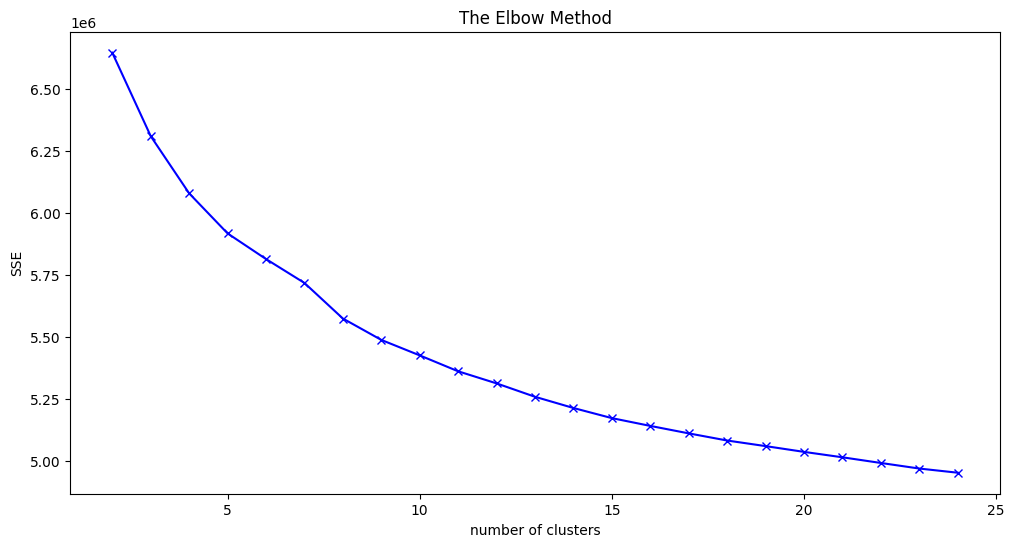

In [81]:
#elbow method kmeans

k_values = range(2,25)
sse = []

for k in k_values:
    print(f"------- Fitting for {k} clusters -------")
    kmeans = KMeans(n_clusters=k,random_state=0,n_init='auto').fit(new_df_sample)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.plot(k_values, sse, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('SSE')
plt.title('The Elbow Method')
plt.show()

In [82]:
#Do the Kmeans clustering

#new_df = scaler.fit_transform(new_df)

kmeans = KMeans(n_clusters=10,random_state=0,n_init='auto')
k_fit = kmeans.fit(new_df)

predictions = k_fit.labels_

In [83]:
#PCA to visualize the clustering

pca = PCA(n_components=3)
df_pca = pca.fit_transform(new_df)

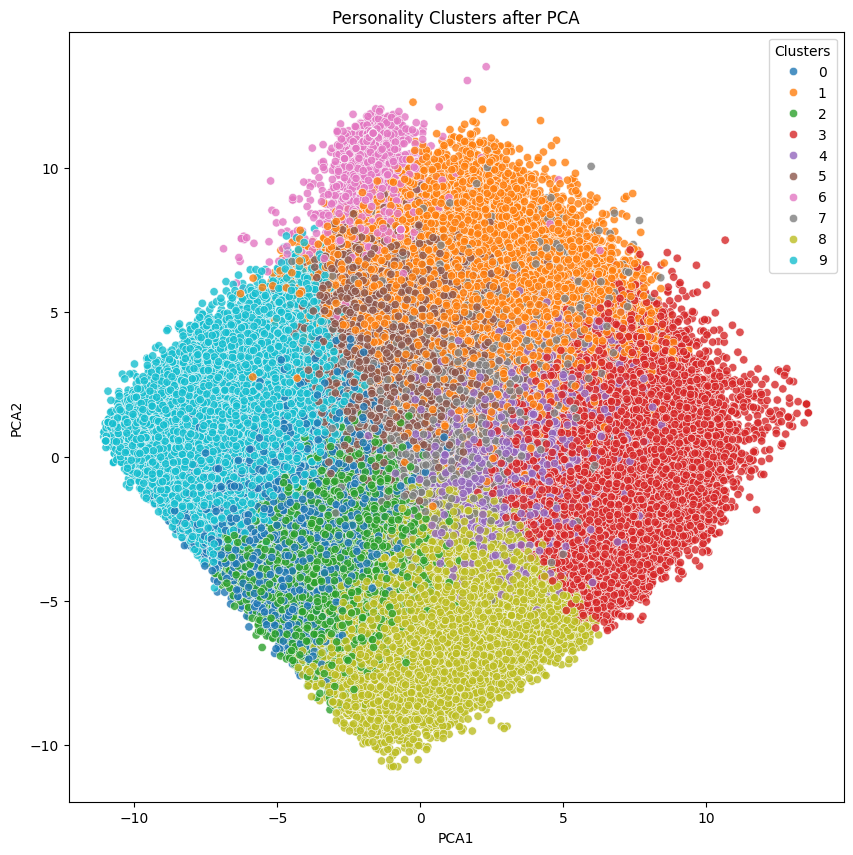

In [84]:
df_pca = pd.DataFrame(data=df_pca, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca['Clusters'] = predictions
df_pca.head()

plt.figure(figsize=(10,10))
sn.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='tab10', alpha=0.8)
plt.title('Personality Clusters after PCA');

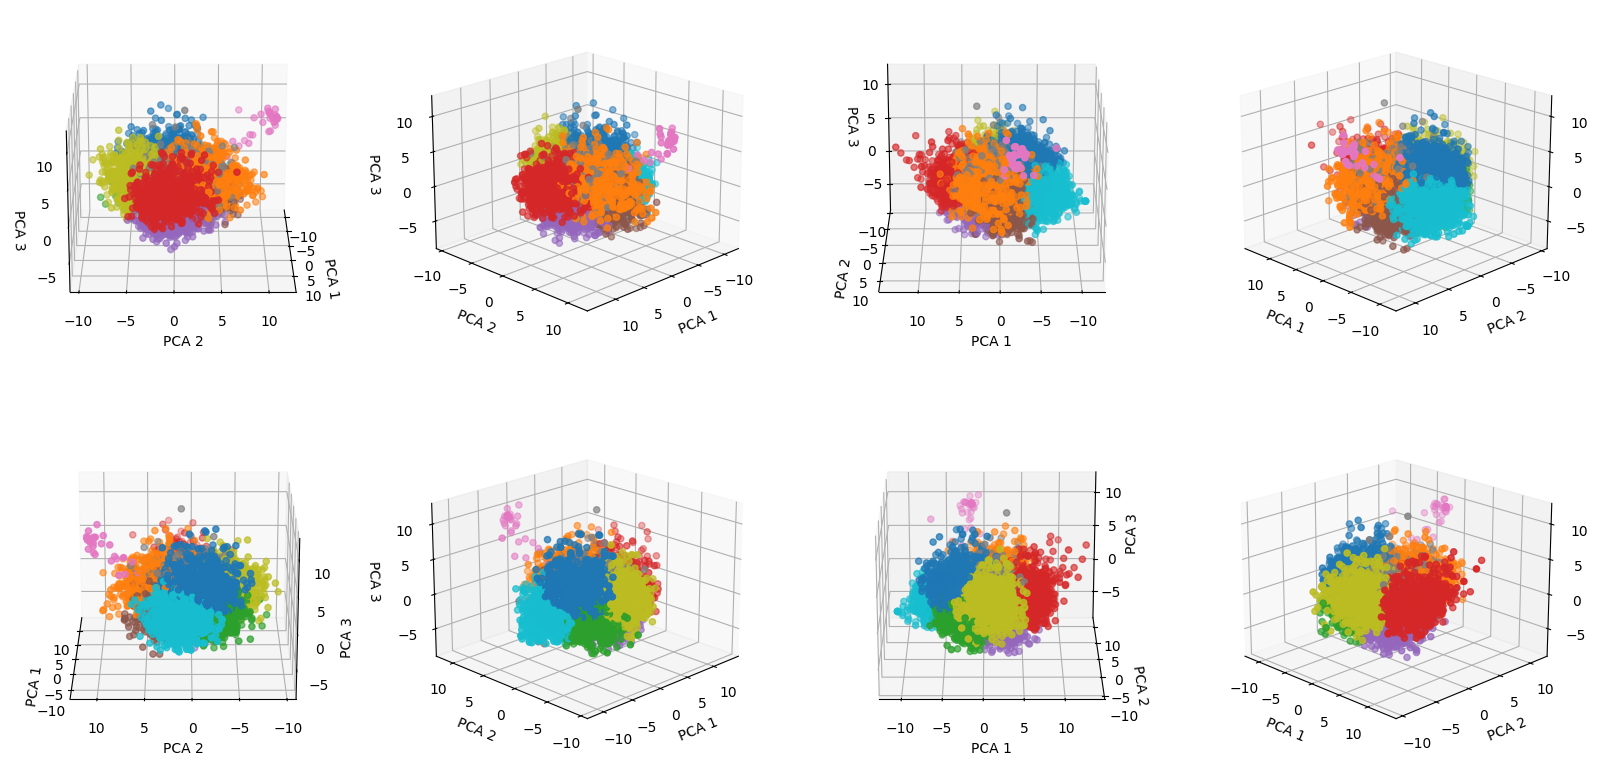

In [85]:
fig = plt.figure(figsize=(20,15))

rotations = [
    [20,0],
    [20,45],
    [20,90],
    [20,135],
    [20,180],
    [20,225],
    [20,270],
    [20,315]
]

for i in range(8):
    ax = fig.add_subplot(3,4,i+1,projection=Axes3D.name)
    
    ax.scatter(df_pca['PCA1'][:10000], df_pca['PCA2'][:10000], df_pca['PCA3'][:10000], c=df_pca['Clusters'][:10000], cmap='tab10')
    
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')
    ax.set_zlabel('PCA 3')
    
    ax.view_init(rotations[i][0],rotations[i][1])

plt.show()

In [90]:
new_df = new_df.to_numpy()

,extroversion,neuroticism,aggreableness,conscientiousness,openness
type,,,,,
0,3.057519,2.618607,3.195793,3.045122,3.345109
1,2.955042,2.703645,2.875033,3.096773,3.387948
2,3.078568,3.248729,3.287695,3.236588,3.348749
3,2.948277,3.632959,3.106657,3.130793,3.208287
4,2.981638,3.518483,3.195210,3.232660,3.325974
5,3.066447,2.541205,3.139702,3.079232,3.241677
6,0.466688,0.406384,0.439444,0.416603,0.383544
7,3.064693,3.103904,3.133541,3.025741,2.967633
8,3.046356,3.641876,3.316541,3.256603,3.412491


In [129]:
#characterize each cluster

characteristics = pd.DataFrame()
characteristics['extroversion'] = np.mean(new_df[:,:10],1)
characteristics['neuroticism'] = np.mean(new_df[:,10:20],1)
characteristics['aggreableness'] = np.mean(new_df[:,20:30],1)
characteristics['conscientiousness'] = np.mean(new_df[:,30:40],1)
characteristics['openness'] = np.mean(new_df[:,40:50],1)
characteristics['type'] = predictions

type_count = characteristics.groupby('type').count()
type_means = characteristics.groupby('type').mean()
type_vars = characteristics.groupby('type').var()

fullquestions = pd.DataFrame(data=new_df)
fullquestions['type'] = predictions

quest_count = fullquestions.groupby('type').count()
quest_means = fullquestions.groupby('type').mean()
quest_vars = fullquestions.groupby('type').var()

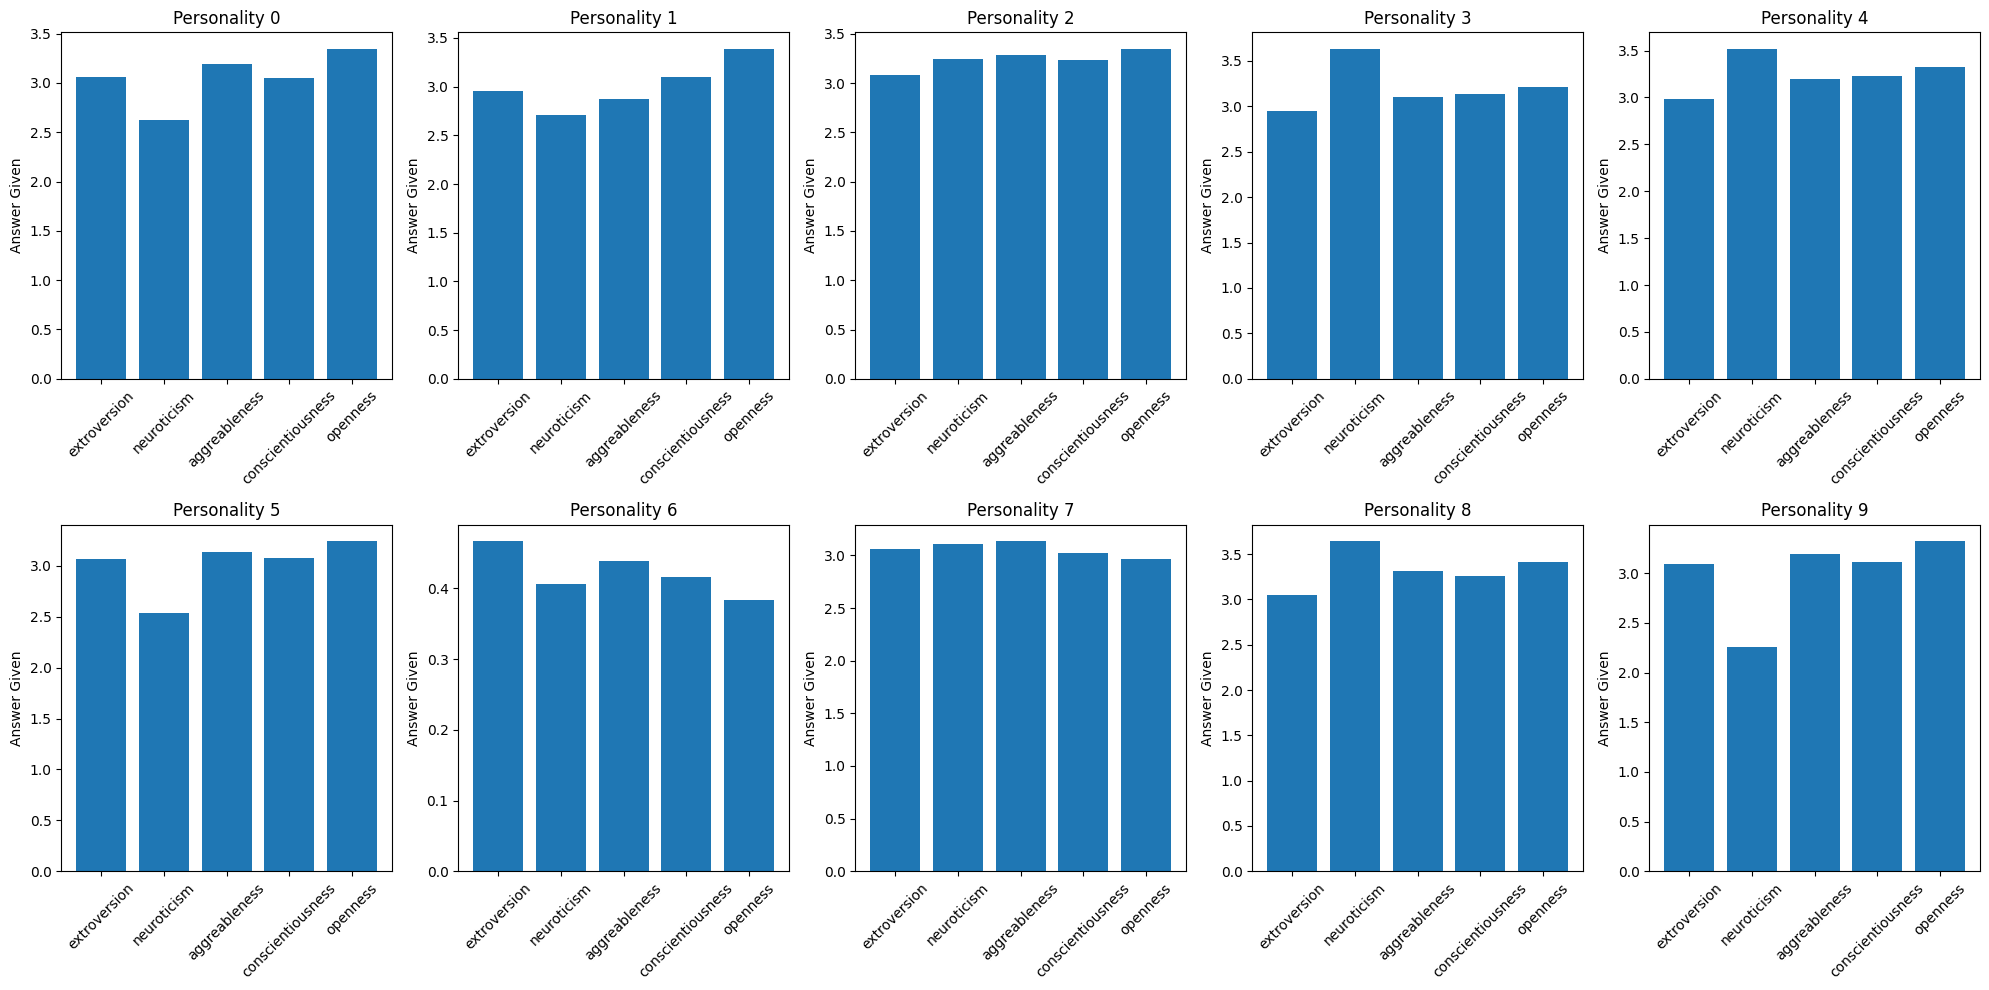

In [133]:
fig = plt.figure(figsize=(20,10))

for i in range(10):
    ax = fig.add_subplot(2,5,i+1)

    ax.bar(type_means.columns,type_means.iloc[i,:])
 
    ax.set_ylabel("Answer Given")
    ax.set_title(f"Personality {i}")

    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

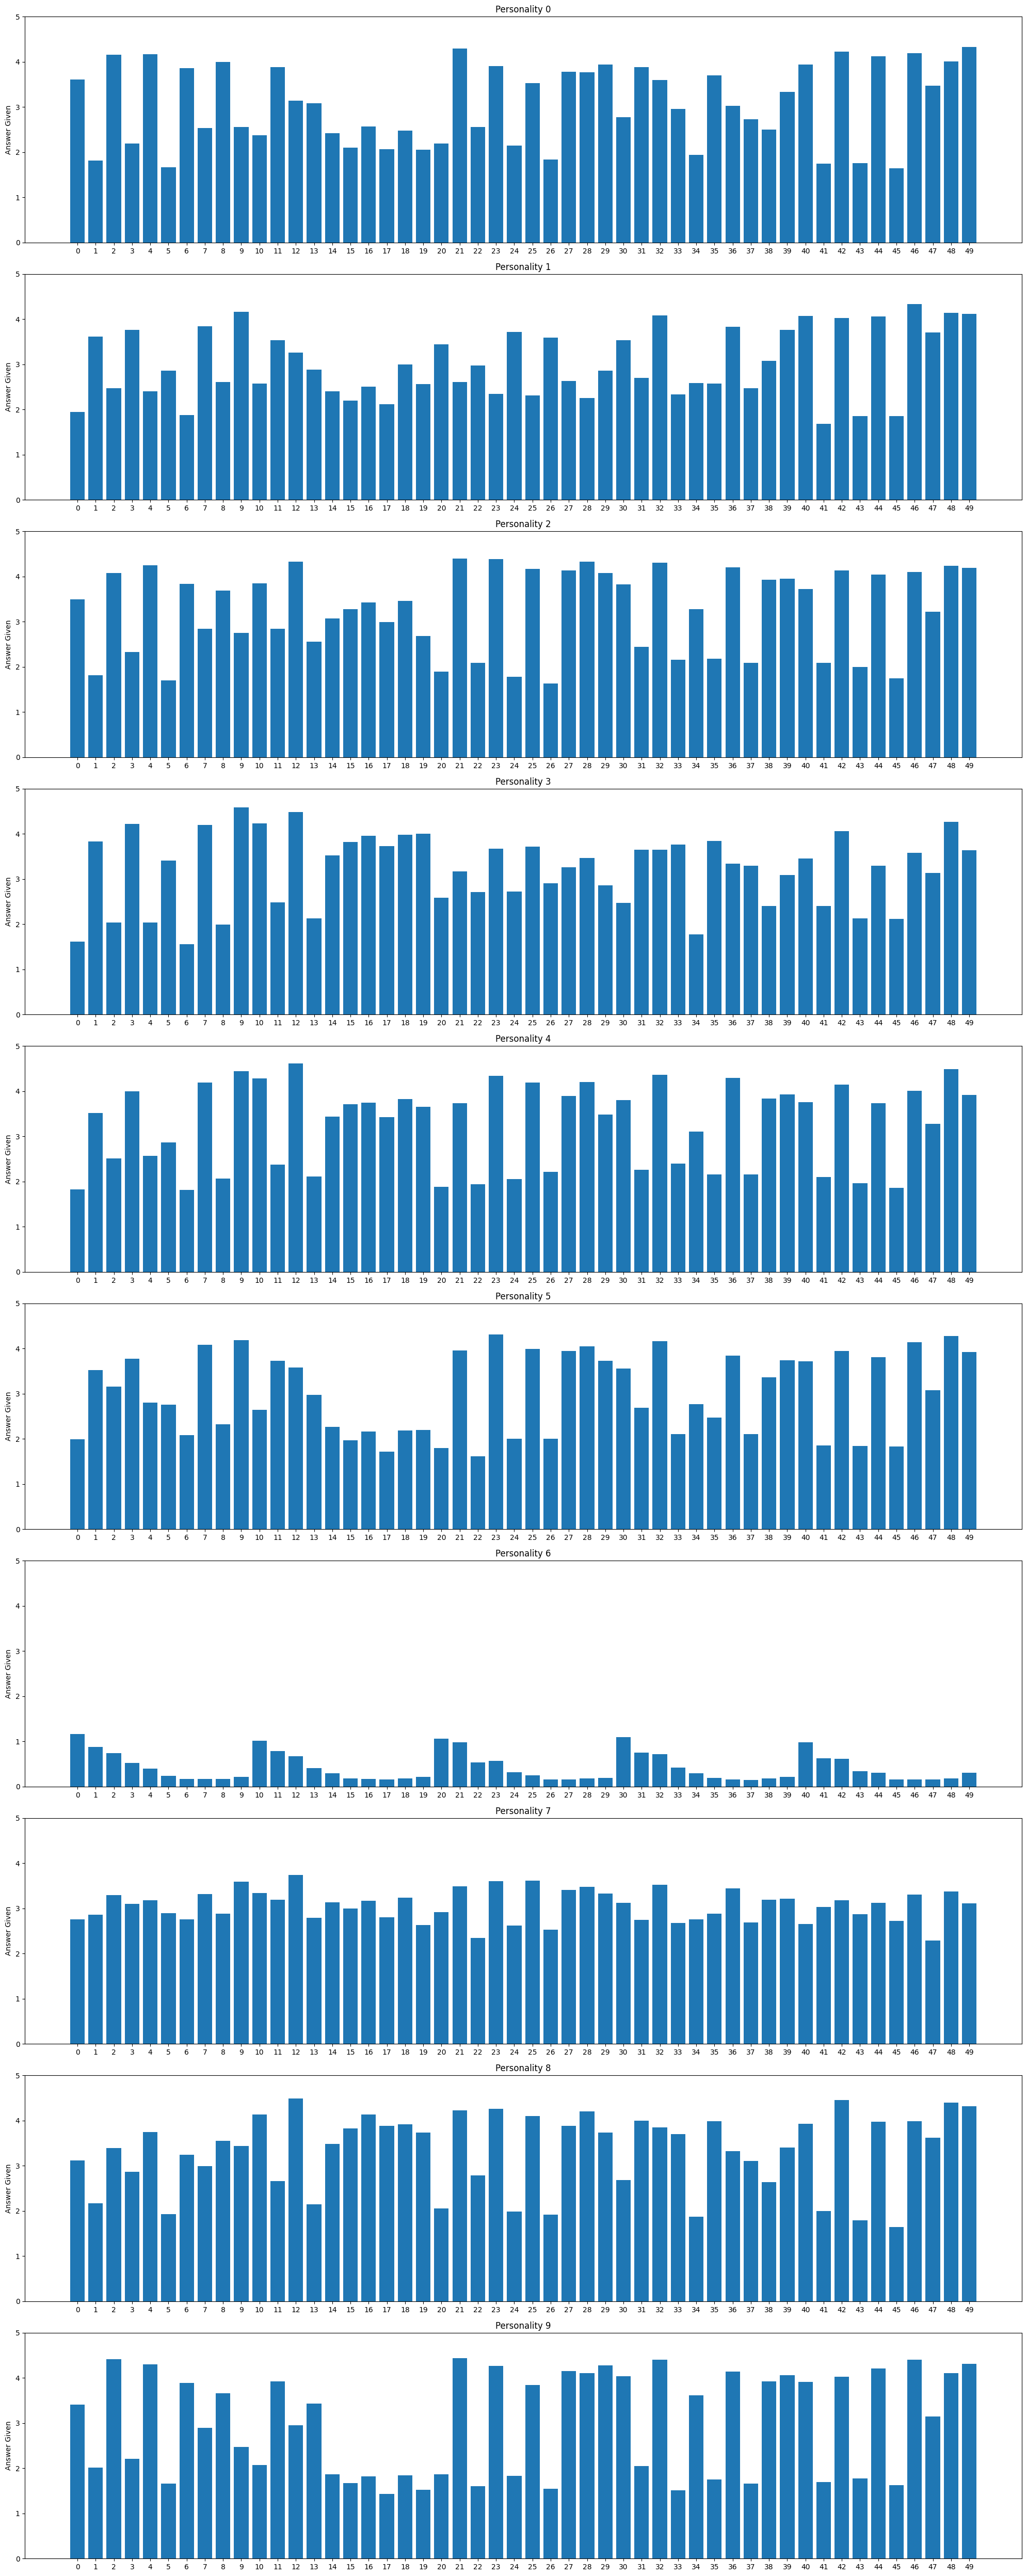

In [137]:
fig = plt.figure(figsize=(20,50))

for i in range(10):
    ax = fig.add_subplot(10,1,i+1)

    ax.bar(quest_means.columns,quest_means.iloc[i,:])
 
    ax.set_ylabel("Answer Given")
    ax.set_title(f"Personality {i}")
    ax.set_xticks(range(50))
    ax.set_yticks(range(6))

    plt.tight_layout()

plt.show()